#### NAMA : M. JOVAN PUTRA ARISANDI
#### NIM : 09011282328026
#### KELAS : SK3B

# Laporan Analisis Data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import skew, kurtosis

**DATASET** : Data set yang digunakan adalah heart_disease_uci.csv yang memuat informasi tentang penyakit jantung. Dataset ini memiliki bagian variabel numerik dan berbagai kategori lainnya

In [ ]:
df = pd.read_csv('C:/Users/jovan/OneDrive/Documents/Bahan Tugas Semester 3/Bahan Data Mining/heart_disease_uci.csv')

**EKSPLORASI AWAL** : 
- Menampilkan 5 baris pertama dan terakhir dari dataset
- Melihat informasi tentang dataset (Tipe data, jumlah entri dan jumlah kolom)
- Mengecek nilai missing dan outliers

In [ ]:
print('Menampilkan 5 beris pertama dari dataset')
display(df.head())

print('\nMenampilkan 5 baris terakhir dari dataset')
display(df.tail())

print ('\nMenampilkan tipe data')
display(df.info())

jumlah_baris,jumlah_kolom = df.shape
print(f"Jumlah entri (Baris): {jumlah_baris}")
print(f"Jumlah kolom : {jumlah_kolom}")

In [ ]:
print('Jumlah nilai missing setiap kolom')
print(df.isnull().sum())

print('\nTotal nilai missing dalam dataset')
print(df.isnull().sum().sum())

print('\nBaris yang mengandung nilai missing')
print(df[df.isnull().any(axis=1)])

**STATISTIK DESKRIPTIF**
- Menghitung dan menampilkan Mean, Median, Mode, Standar Deviasi, Varianse, Skewness, dan Kurtosis untuk kolom numerik
- Hitung korelasi antar variabel numerik

In [ ]:
df_numeric = df.select_dtypes(include='number')

for column in df_numeric.columns:
    print(f"\nStatistik untuk kolom '{column}':")
    
    mean_val = df_numeric[column].mean()
    median_val = df_numeric[column].median()
    mode_val = df_numeric[column].mode()[0]
    std_dev = df_numeric[column].std()
    variance = df_numeric[column].var()
    skewness = skew(df_numeric[column])
    kurt = kurtosis(df_numeric[column])
    
    print(f"Mean: {mean_val}")
    print(f"Median: {median_val}")
    print(f"Mode: {mode_val}")
    print(f"Standar Deviasi: {std_dev}")
    print(f"Variansi: {variance}")
    print(f"Skewness: {skewness}")
    print(f"Kurtosis: {kurt}")

In [ ]:
df_numerik = df.select_dtypes(include=['float64', 'int64'])
korelasi_numerik = df_numerik.corr()

print('Korelasi anter variabelnumerik')
print(korelasi_numerik)

plt.figure(figsize=(10, 8))
sns.heatmap(korelasi_numerik, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Matriks Korelasi Antar Variabel Numerik")
plt.show()

**VISUALISASI DATA**
- Membuat Histogram dan Box Plot untuk setiap variabel numerik
- buat scatter plot untuk pasangan variabel yang memiliki korelasi tinggi

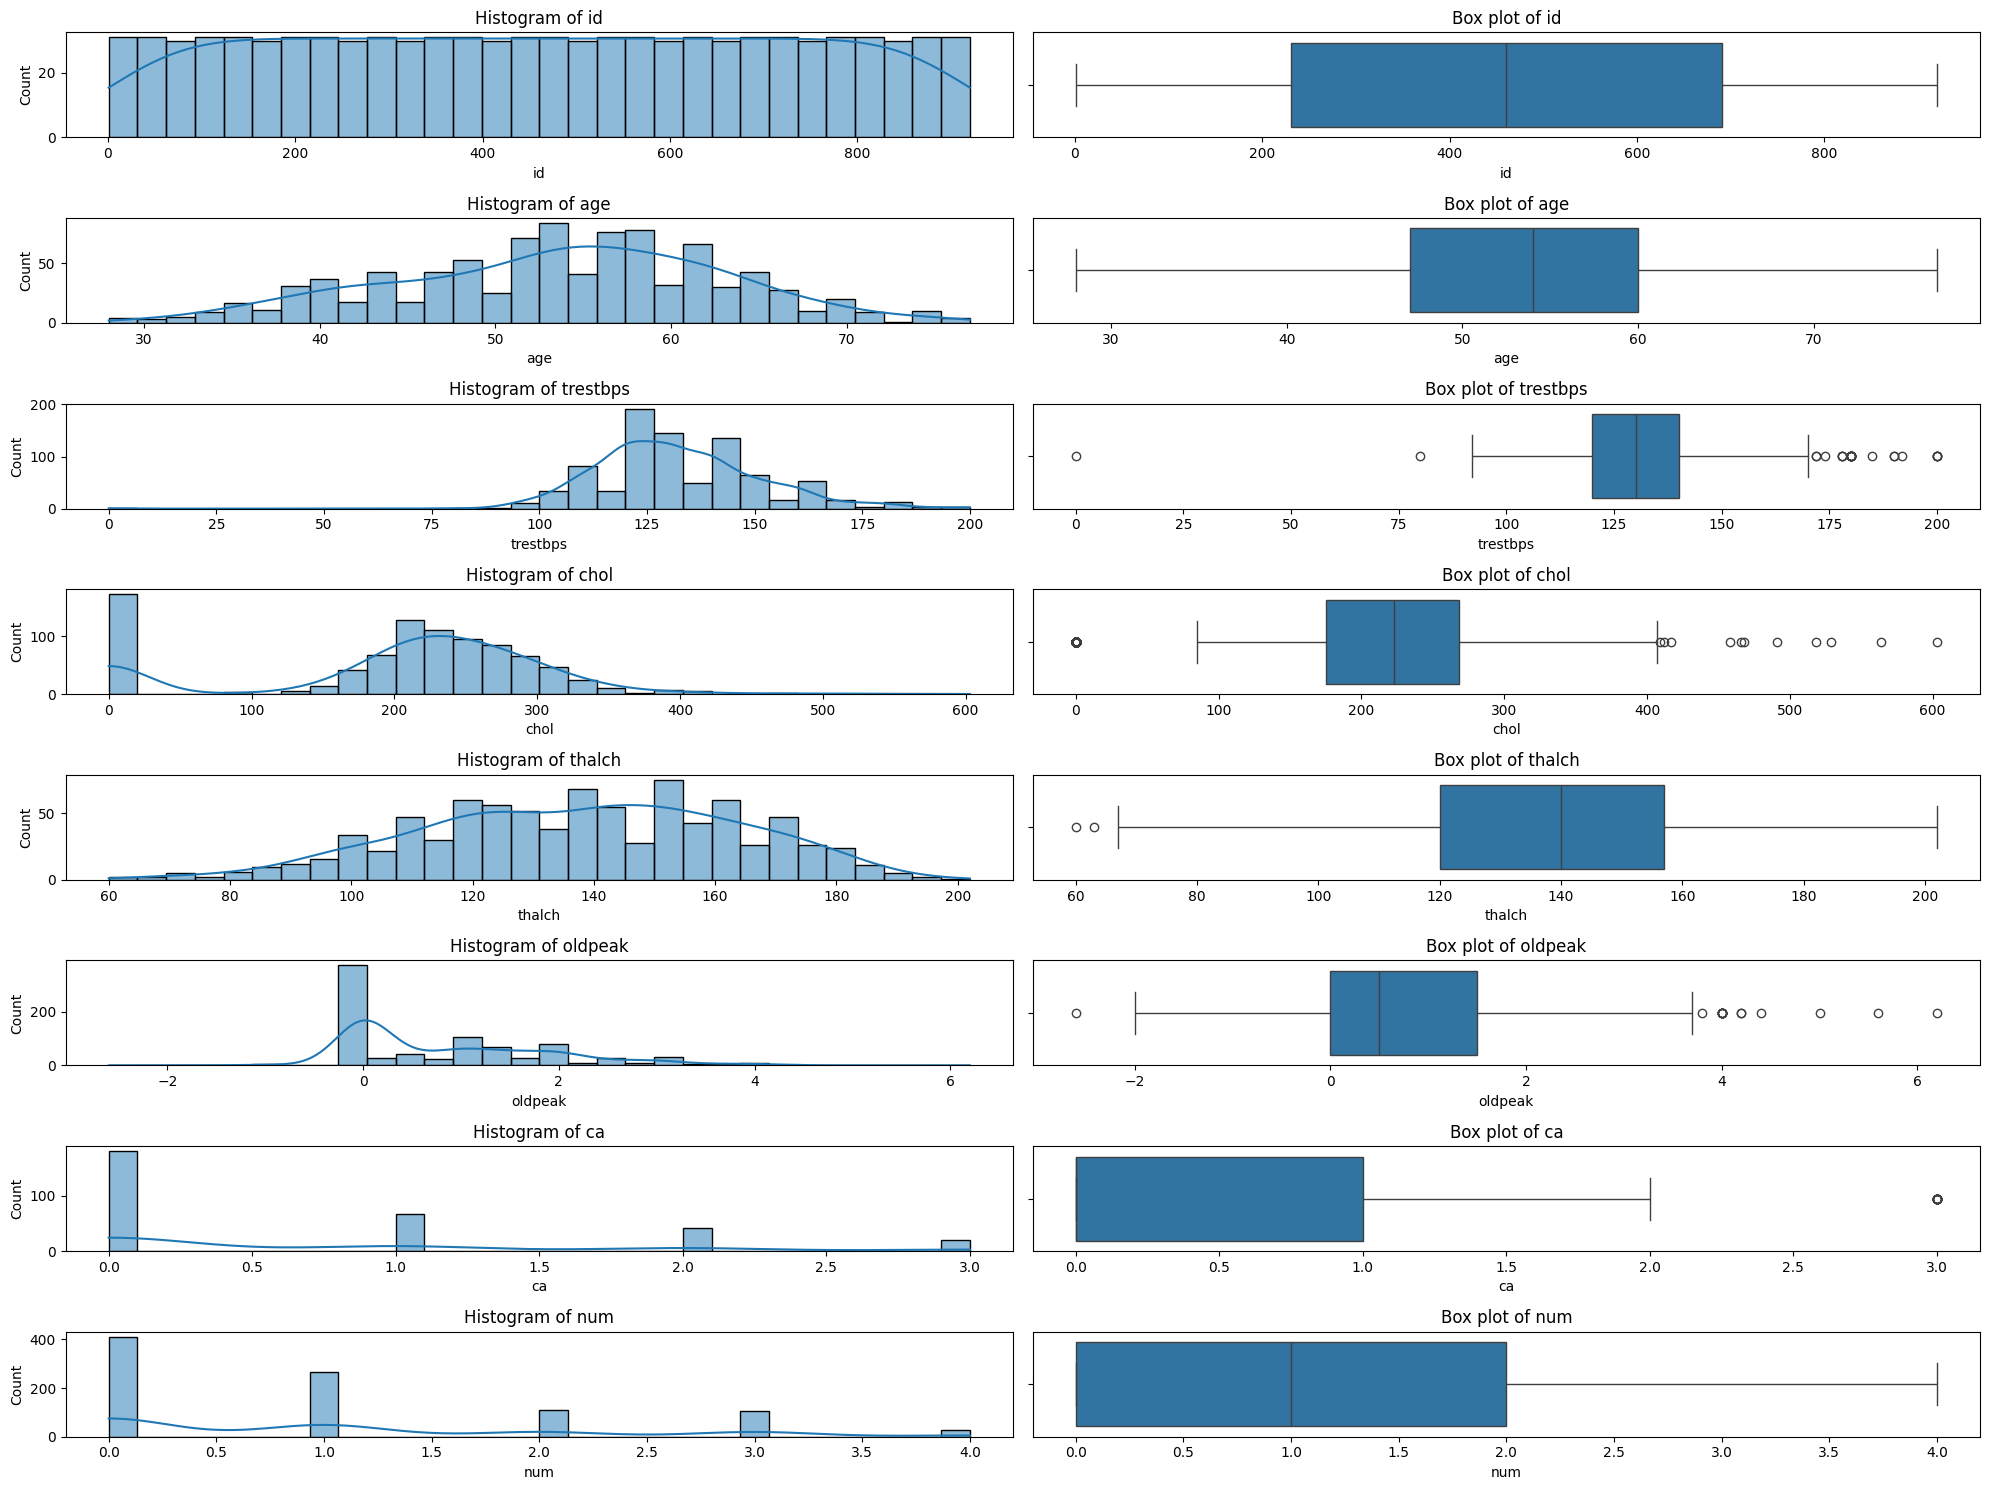

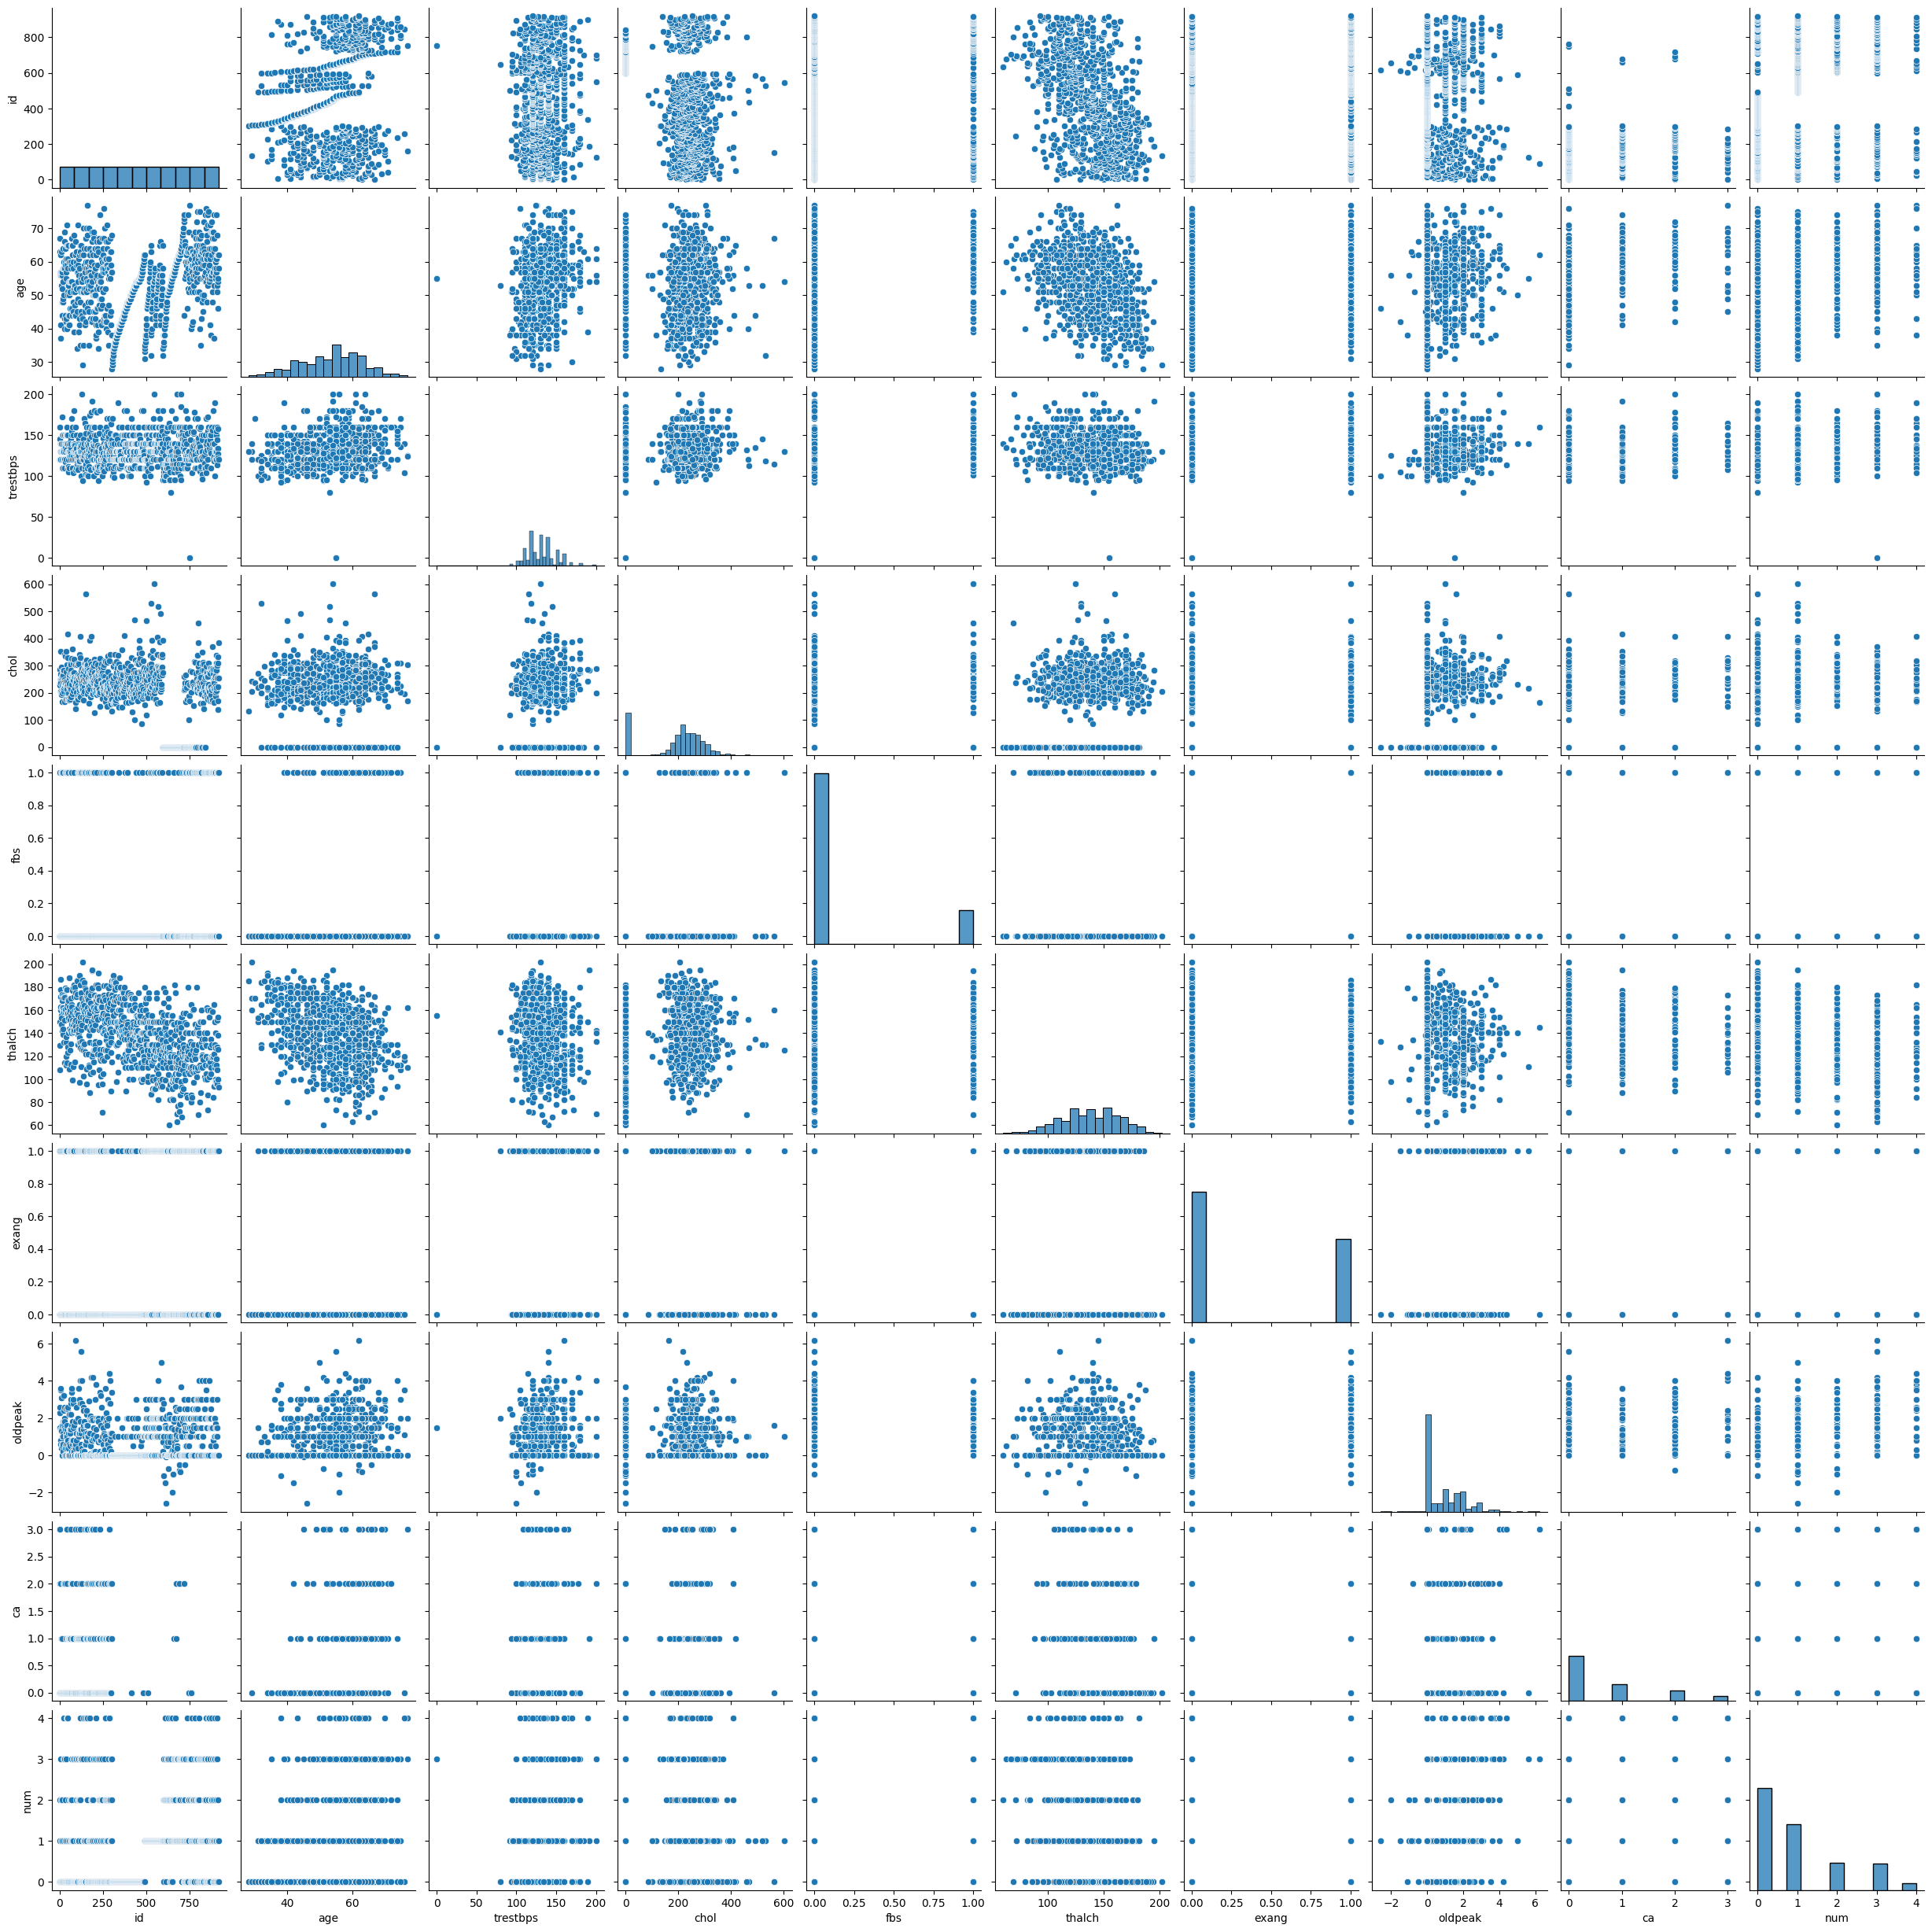

In [10]:
plt.figure(figsize=(20, 15))

for i, col in enumerate(df_numerik.columns):
    plt.subplot(len(df_numerik.columns), 2, 2*i+1)
    sns.histplot(df_numerik[col], kde=True, bins=30)
    plt.title(f'Histogram of {col}')

    plt.subplot(len(df_numerik.columns), 2, 2*i+2)
    sns.boxplot(x=df_numerik[col])
    plt.title(f'Box plot of {col}')
    
plt.tight_layout()
plt.show()

sns.pairplot(df)
plt.show()

In [ ]:
threshold = 0.7

pasangan_korelasi_tinggi = []

for i in range(len(korelasi_numerik.columns)):
    for j in range(i):
        if abs(korelasi_numerik.iloc[i, j]) > threshold:
            pasangan_korelasi_tinggi.append((korelasi_numerik.columns[i], korelasi_numerik.columns[j]))

if pasangan_korelasi_tinggi:
    plt.figure(figsize=(10, 8))

    for i, (var1, var2) in enumerate(pasangan_korelasi_tinggi):
        plt.subplot(len(pasangan_korelasi_tinggi), 1, i+1)
        sns.scatterplot(x=df_numerik[var1], y=df_numerik[var2])
        plt.title(f'Scatter Plot of {var1} vs {var2}')
    
    plt.tight_layout()
    plt.show()
else:
    print("Tidak ada pasangan variabel dengan korelasi tinggi.")

#### LAPORAN AKHIR
Dalam analisis ini saya telah melakukan eksplorasi awal, menghitung statistik deskriptif, memvisualisasikan data dengan histogram, box plot, dan scatter plot untuk pasangan variabel dengan korelasi tinggi. Diketahui pada data missing kolom dengan nilai missing tertinggi terdapat pada kolom 'ca' dengan 611 total nilai hilang (missing) dan Beberapa baris yang mengandung nilai missing menunjukkan data yang tidak lengkap di kolom seperti trestbps, chol, fbs, restecg, thalch, exang, oldpeak, slope, ca, thal, untuk total seluruh data hilang yang ada dalam dataset berjumlah 1759 data, dan juga untuk gambar heatmap matriks korelasi antar variabel numerik menunjukkan adanya konsistensi warna merah dari sudut kiri atas menuju ke sudut kanan bawah yang menandakan adanya korelasi yang sangat kuat antara variabel yang terletak pada sumbu baris dan kolom tersebut.


Missing values yang pada data ini juga sangat banyak, dari total 16 variabel yang ada, terdapat 10 variabel yang memiliki missing value, diantaranya adalah 'trestbps' 59 values, 'chol' 30 values, 'fbs' 90 values, 'resetecg' 2 values, 'thalch' 55 values, 'exang' 55 values, 'oldpeak' 62 values, 'slope' 309 values, 'ca' 611 values, dan 'thal' 486 values. Missing values terjadi paling banyak pada variabel 'ca' sebanyak 611 values,'thal' sebanyak 486 values dan 'slope' sebanyak 309 values.

kesimpulan yang dapat diambil dari data tersebut adalah data tersebut memiliki 920 total input pasien dengan 16 variabel, namun ada variabel yang memiliki missing value sebanyak 7 variabel yang missing valuenya tidak banyak, hanya 1 dan 2 digit angka saja dan 3 variabel yang memiliki missing value yang banyak seperti variabel 'ca', 'thal', dan 'slope' yang mencapai 3 digit angka